In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 6.1 缺失值

### 6.1.1 pandas与缺失数据

6.1 DataFrame 类的 isna 方法

In [2]:
df = pd.DataFrame([[0,np.nan,2],[None,4,5]], columns=list('abc'))
df.isna()

,a,b,c
0,False,True,False
1,True,False,False


6.2 pandas 中 inf、–inf 的处理

In [3]:
df2 = df.copy()
df2.loc[1, 'a'] = float('inf')
df2.loc[0, 'b'] = -np.inf
df2

,a,b,c
0,0.0,-inf,2
1,inf,4.0,5


In [4]:
print(pd.options.mode.use_inf_as_na)
df2.isna()

False


C:\Users\liye\AppData\Local\Temp\ipykernel_17256\4153149637.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  print(pd.options.mode.use_inf_as_na)


,a,b,c
0,False,False,False
1,False,False,False


In [5]:
pd.options.mode.use_inf_as_na = True
df2.isna()

C:\Users\liye\AppData\Local\Temp\ipykernel_17256\3206675050.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


,a,b,c
0,False,True,False
1,True,False,False


6.3 np.nan 和 None

In [6]:
print(np.nan == np.nan)
print(None == None)

False
True


6.4 np.nan 的判断

In [7]:
df == np.nan

,a,b,c
0,False,False,False
1,False,False,False


6.5 pandas 中对 NaT 的处理

In [8]:
df['b'] = pd.Timestamp('20190101')
df.iloc[0, 1] = np.nan
df

,a,b,c
0,0.0,NaT,2
1,NaN,2019-01-01,5


6.6 包含数值类型值的处理

In [9]:
ser = pd.Series([1,2,np.nan,None])
ser

0    1.0
1    2.0
2    NaN
3    NaN
dtype: float64

6.7 包含 object 类型值的 Series 对象和 None 的处理

In [10]:
ser = pd.Series(['a','b',np.nan,None])
ser

0       a
1       b
2     NaN
3    None
dtype: object

6.8 包含 NaN 的运算结果

In [11]:
df = pd.DataFrame([[1,2],[np.nan,4],[np.nan,np.nan]], columns=['a','b'])
df

,a,b
0,1.0,2.0
1,NaN,4.0
2,NaN,NaN


In [12]:
df['a'] + df['b']

0    3.0
1    NaN
2    NaN
dtype: float64

### 6.1.2 缺失值的确认

6.9 isna 方法和 isna 函数

In [13]:
pd.isnull(df)

,a,b
0,False,False
1,True,False
2,True,True


6.10 DataFrame 类的 notna 方法

In [14]:
df.notna()

,a,b
0,True,True
1,False,True
2,False,False


6.11 Series 类的 isna 方法和 notna 方法

In [15]:
df['a'].isna()

0    False
1     True
2     True
Name: a, dtype: bool

In [16]:
df['a'].notna()

0     True
1    False
2    False
Name: a, dtype: bool

6.12 基于 isna 方法和 notna 方法的引用

In [17]:
df[df['a'].isna()]

,a,b
1,NaN,4.0
2,NaN,NaN


In [18]:
df[df['a'].notna()]

,a,b
0,1.0,2.0


### 6.1.3 缺失值的删除

6.13 Index 对象的 isna 方法和 notna 方法

In [19]:
df.index = [0,np.nan,2]
print(df.index.isna())
print(df.index.notna())

[False  True False]
[ True False  True]


6.14 使用运算符“==”判断缺失值定

In [20]:
df == np.nan

,a,b
0.0,False,False
NaN,False,False
2.0,False,False


 6.15 DataFrame 类的 dropna 方法

In [21]:
val = np.arange(0,9).reshape(3, 3)
df = pd.DataFrame(val, index=list('def'), columns=list('abc'))
df.loc['d', 'a'], df.loc['e', 'b'] = np.nan, np.nan
df

,a,b,c
d,NaN,1.0,2
e,3.0,NaN,5
f,6.0,7.0,8


In [22]:
df.dropna(axis=0)

,a,b,c
f,6.0,7.0,8


df.dropna(axis=1)

6.16 dropna 方法的 how 参数

In [23]:
df2 = df.copy()
df2['a'] = np.nan
df2.dropna(axis=1, how='any')

,c
d,2
e,5
f,8


In [24]:
df2.dropna(axis=1, how='all')

,b,c
d,1.0,2
e,NaN,5
f,7.0,8


6.17 dropna 方法的 thresh 参数

In [25]:
df2.loc['d','b'] = np.nan
df2.loc['d','c'] = np.nan
df2

,a,b,c
d,NaN,NaN,NaN
e,NaN,NaN,5.0
f,NaN,7.0,8.0


In [26]:
df2.dropna(axis=1, thresh=1)

,b,c
d,NaN,NaN
e,NaN,5.0
f,7.0,8.0


In [27]:
df2.dropna(axis=1, thresh=2)

,c
d,NaN
e,5.0
f,8.0


6.18 dropna 方法的 subset 参数

In [28]:
df.dropna(axis=1,subset=['e'])

,a,c
d,NaN,2
e,3.0,5
f,6.0,8


6.19 dropna 方法的 subset 参数（多个标签）

In [29]:
df.dropna(axis=1, subset=['d','f'])

,b,c
d,1.0,2
e,NaN,5
f,7.0,8


6.20 dropna 方法的 inplace 参数

In [30]:
df.dropna(axis=1, subset=['e','f'], inplace=True)
df

,a,c
d,NaN,2
e,3.0,5
f,6.0,8


6.21 Series 类的 dropna 方法

In [31]:
ser = pd.Series([0,None,2,np.nan])
ser.dropna()

0    0.0
2    2.0
dtype: float64

### 6.1.4 缺失值的置换

6.22 DataFrame 类的 fillna 方法

In [32]:
val = np.arange(0,9).reshape(3, 3)
df = pd.DataFrame(val, index=list('def'), columns=list('abc'))
df.loc['d', 'a'], df.loc['e', 'b'] = np.nan, np.nan
df.fillna(value=0)

,a,b,c
d,0.0,1.0,2
e,3.0,0.0,5
f,6.0,7.0,8


6.23 fillna 方法的 value 参数

In [33]:
filling = {'a':100, 'b':200, 'c':300}
df.fillna(value=filling)

,a,b,c
d,100.0,1.0,2
e,3.0,200.0,5
f,6.0,7.0,8


6.24 fillna 方法和 method 参数（bfill）

In [34]:
df.fillna(method='bfill',axis=0)

C:\Users\liye\AppData\Local\Temp\ipykernel_17256\2743158383.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',axis=0)


,a,b,c
d,3.0,1.0,2
e,3.0,7.0,5
f,6.0,7.0,8


6.25 fillna 方法和 method 参数（bfill）

In [35]:
df.fillna(method='bfill',axis=1)

C:\Users\liye\AppData\Local\Temp\ipykernel_17256\3381026564.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',axis=1)


,a,b,c
d,1.0,1.0,2.0
e,3.0,5.0,5.0
f,6.0,7.0,8.0


6.26 fillna 方法和 method 参数（ffill）

In [36]:
df.fillna(method='ffill', axis=0)

C:\Users\liye\AppData\Local\Temp\ipykernel_17256\3122255136.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=0)


,a,b,c
d,NaN,1.0,2
e,3.0,1.0,5
f,6.0,7.0,8


6.27 DataFrame 对象的创建

In [37]:
df2 = df.copy()
df2['a'] = np.nan
df2.loc['d', 'b'] = np.nan
df2.loc['d', 'c'] = np.nan
df2

,a,b,c
d,NaN,NaN,NaN
e,NaN,NaN,5.0
f,NaN,7.0,8.0


6.28 fillna 方法的 limit 参数（值为 1）

In [38]:
df2.fillna(method='bfill', limit=1, axis=0)

C:\Users\liye\AppData\Local\Temp\ipykernel_17256\1062468071.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method='bfill', limit=1, axis=0)


,a,b,c
d,NaN,NaN,5.0
e,NaN,7.0,5.0
f,NaN,7.0,8.0


6.29 fillna 方法的 limit 参数（值为 2）

In [39]:
df2.fillna(method='bfill', limit=2, axis=0)

C:\Users\liye\AppData\Local\Temp\ipykernel_17256\365826541.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method='bfill', limit=2, axis=0)


,a,b,c
d,NaN,7.0,5.0
e,NaN,7.0,5.0
f,NaN,7.0,8.0


6.30 使用 fillna 方法和 Series 对象置换缺失值

In [40]:
ser = pd.Series([1,2,3], index=['a','b','c'])
ser

a    1
b    2
c    3
dtype: int64

In [41]:
df.fillna(ser)

,a,b,c
d,1.0,1.0,2
e,3.0,2.0,5
f,6.0,7.0,8


6.31 fillna 方法和 mean 方法

In [42]:
df.mean()

a    4.5
b    4.0
c    5.0
dtype: float64

In [43]:
df.fillna(df.mean(), axis=0)

,a,b,c
d,4.5,1.0,2
e,3.0,4.0,5
f,6.0,7.0,8


6.32 使用 fillna 方法、median 方法、max 方法进行缺失值的置换

In [44]:
df.fillna(df.median(), axis=0)

,a,b,c
d,4.5,1.0,2
e,3.0,4.0,5
f,6.0,7.0,8


In [45]:
df.fillna(df.max(), axis=0)

,a,b,c
d,6.0,1.0,2
e,3.0,7.0,5
f,6.0,7.0,8


6.33 fillna 方法的 NotImplementedError

In [46]:
# df.fillna(df.mean(axis=1), axis=1)

6.34 DataFrame 对象的创建

In [47]:
val = np.arange(0,25).reshape(5, 5)
df = pd.DataFrame(val, columns=list('abcde'))

for i, c in enumerate(df.columns):
    df.loc[i, c] = np.nan

df

,a,b,c,d,e
0,NaN,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,NaN,13.0,14.0
3,15.0,16.0,17.0,NaN,19.0
4,20.0,21.0,22.0,23.0,NaN


6.35 Series 类的 interpolate 方法（linear）

In [48]:
df['b'].interpolate(method='linear')

0     1.0
1     6.0
2    11.0
3    16.0
4    21.0
Name: b, dtype: float64

6.36 索引标签和列 b 的散点图

<Axes: xlabel='index', ylabel='b'>

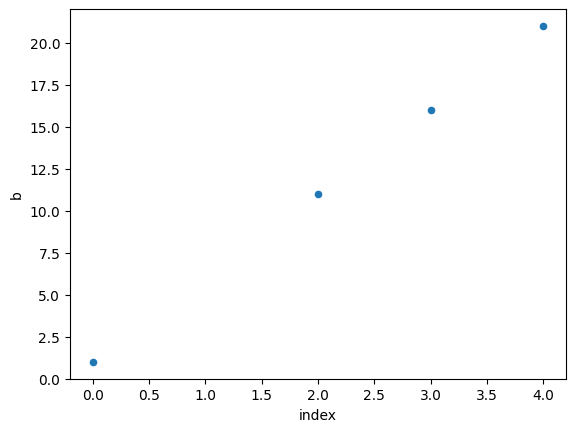

In [49]:
df['index'] = df.index
df.plot(kind='scatter', x='index',y='b')

6.37 索引标签和列 b 的散点图（置换后）

<Axes: xlabel='index', ylabel='b'>

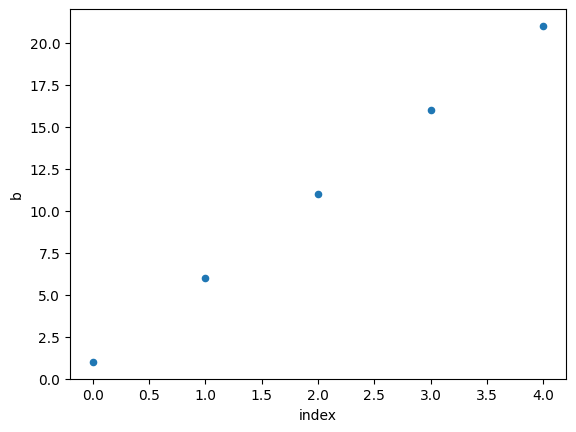

In [50]:
df2 = df.interpolate(method='linear')
df2.plot(kind='scatter', x='index',y='b')

6.38 Series 类的 interpolate 方法

In [51]:
ser = pd.Series([4,np.nan,np.nan,16])
ser.interpolate(method='linear')

0     4.0
1     8.0
2    12.0
3    16.0
dtype: float64

6.39 interpolate 方法和 method 参数（index）

In [52]:
ser.index = [0,2,5,10]
ser

0      4.0
2      NaN
5      NaN
10    16.0
dtype: float64

In [53]:
ser.interpolate(method='linear')

0      4.0
2      8.0
5     12.0
10    16.0
dtype: float64

In [54]:
ser.interpolate(method='index')

0      4.0
2      6.4
5     10.0
10    16.0
dtype: float64

6.40 interpolate 方法和 axis 参数

In [55]:
df.interpolate(method='linear', axis=1)

,a,b,c,d,e,index
0,NaN,1.0,2.0,3.0,4.0,0.0
1,5.0,6.0,7.0,8.0,9.0,1.0
2,10.0,11.0,12.0,13.0,14.0,2.0
3,15.0,16.0,17.0,18.0,19.0,3.0
4,20.0,21.0,22.0,23.0,13.5,4.0


## 6.2 离群值

### 6.2.1 何为离散值

### 6.2.2 z分数

6.41 Series 对象的创建

In [56]:
height = [178,190,187,179,192,186,188,1.81,187,177,190,181,178,180,171]
ser = pd.Series(height)
ser

0     178.00
1     190.00
2     187.00
3     179.00
4     192.00
5     186.00
6     188.00
7       1.81
8     187.00
9     177.00
10    190.00
11    181.00
12    178.00
13    180.00
14    171.00
dtype: float64

6.42 从 Series 对象中计算出平均值和标准差

In [57]:
mean = ser.mean()
std = ser.std(ddof=0)
print(mean)
print(std)

171.054
45.60205577237353


6.43 计算出 z 分数

In [58]:
zscore = (ser - mean) / std
zscore

0     0.152318
1     0.415464
2     0.349677
3     0.174247
4     0.459321
5     0.327748
6     0.371606
7    -3.711324
8     0.349677
9     0.130389
10    0.415464
11    0.218104
12    0.152318
13    0.196175
14   -0.001184
dtype: float64

6.44 基于 z 分数检测离群值

In [59]:
ser[(zscore < -3) | (zscore > 3)]

7    1.81
dtype: float64

6.45 平均值和索引标签 14 的元素

In [60]:
print(ser[14])
print(mean)

171.0
171.054


6.46 计算出索引 5 ～ 9 的 z 分数

In [61]:
ser2 = ser[5:10]
ser2

5    186.00
6    188.00
7      1.81
8    187.00
9    177.00
dtype: float64

In [62]:
mean2 = ser2.mean()
std2 = ser2.std(ddof=0)
zscore2 = (ser2 - mean2) / std2
print(mean2)
print(zscore2)

147.962
5    0.519778
6    0.547107
7   -1.997122
8    0.533442
9    0.396795
dtype: float64


### 6.2.3 四分位距

6.47 使用 quantile 方法计算出四分位距（IQR）

In [63]:
q1 = ser.quantile(0.25)
q3 = ser.quantile(0.75)
iqr = q3 - q1
print('q1 = ', q1)
print('q3 = ', q3)
print('IQR = ', iqr)

q1 =  178.0
q3 =  187.5
IQR =  9.5


6.48 计算出下方和上方的界点

In [64]:
bottom = q1 - (1.5 * iqr)
up = q3 + (1.5 * iqr)
print(bottom)
print(up)

163.75
201.75


6.49 基于 IQR 检测离群值

In [65]:
ser[(ser < bottom) | (ser > up)]

7    1.81
dtype: float64

### 箱形图

6.50 使用 DataFrame 对象绘制箱形图

<Axes: >

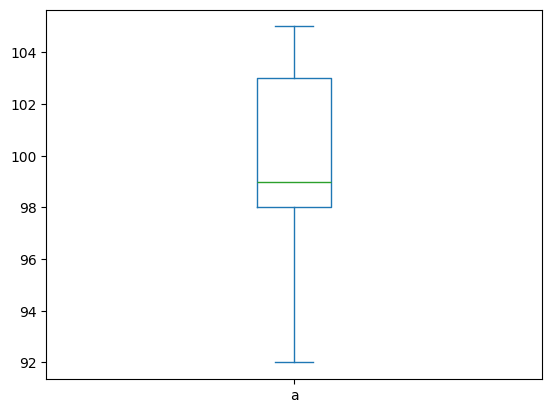

In [66]:
val = [100,104,92,98,98,105,]
df = pd.DataFrame({'a':val})
df.plot(kind='box')

6.51 计算出 DataFrame 对象的概括统计量

In [67]:
q1 = df['a'].quantile(0.25)
q2 = df['a'].quantile(0.5)
q3 = df['a'].quantile(0.75)
iqr = q3 - q1
dfmax = df['a'].max()
dfmin = df['a'].min()
print('q1 = ',q1)
print('q2 = ',q2)
print('q3 = ',q3)
print('iqr = ',iqr)
print('max = ',dfmax)
print('min = ',dfmin)

q1 =  98.0
q2 =  99.0
q3 =  103.0
iqr =  5.0
max =  105
min =  92


6.52 使用包含离群值的 DataFrame 对象绘制箱形图

In [68]:
df['b'] = [100,104,90,98,98,105]
df

,a,b
0,100,100
1,104,104
2,92,90
3,98,98
4,98,98
5,105,105


<Axes: >

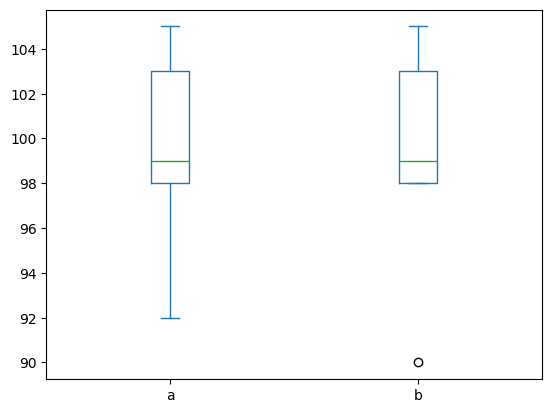

In [69]:
df.plot(kind='box')

## 6.3 重复数据

### 6.3.1 重复数据的检测

6.53 DataFrame 对象的创建

In [70]:
val = [[8,7,6,],[8,7,6],[8,7,6]]
df = pd.DataFrame(val, index=list('edf') ,columns=list('abc'))
df

,a,b,c
e,8,7,6
d,8,7,6
f,8,7,6


6.54:数据帧的duplicated方法

In [71]:
df.duplicated(keep='first')

e    False
d     True
f     True
dtype: bool

6.55 duplicated 方法和 keep 参数（last 和 False）

In [72]:
df.duplicated(keep='last')

e     True
d     True
f    False
dtype: bool

In [73]:
df.duplicated(keep=False)

e    True
d    True
f    True
dtype: bool

6.56 duplicated 方法和 subset 参数

In [74]:
df.loc['f', 'b'] = 5
df.duplicated(subset='a', keep=False)

e    True
d    True
f    True
dtype: bool

In [75]:
df.duplicated(subset='b', keep=False)

e     True
d     True
f    False
dtype: bool

6.57 duplicated 方法和 subset 参数（多个列）

In [76]:
df.duplicated(subset=['a','b'], keep=False)

e     True
d     True
f    False
dtype: bool

6.58 从 DataFrame 对象引用重复的位置

In [77]:
df[df.duplicated(keep=False)]

,a,b,c
e,8,7,6
d,8,7,6


6.59 Series 类的 duplicated 方法

In [78]:
df['a'].duplicated(keep=False)

e    True
d    True
f    True
Name: a, dtype: bool

6.60 Index 对象的 duplicated 方法

In [79]:
df.index = ['d','d','e']
df.index.duplicated(keep=False)

array([ True,  True, False])

### 6.3.2 重复数据的删除

6.61 DataFrame 对象的创

In [80]:
# 数据帧制作
val = [[8,7,6,],[8,7,6],[8,5,6]]
df = pd.DataFrame(val, index=list('edf') ,columns=list('abc'))
df

,a,b,c
e,8,7,6
d,8,7,6
f,8,5,6


6.62 DataFrame 类的 drop_duplicates 方法

In [81]:
df.drop_duplicates(keep='first')

,a,b,c
e,8,7,6
f,8,5,6


6.63 drop_duplicates 方法的 keep 参数（last 和 False）

In [82]:
df.drop_duplicates(keep='last')

,a,b,c
d,8,7,6
f,8,5,6


In [83]:
df.drop_duplicates(keep=False)

,a,b,c
f,8,5,6


6.64 drop_duplicates 方法的 subset 参数

In [84]:
df.drop_duplicates(subset=['a','b'], keep=False)

,a,b,c
f,8,5,6


6.65 Series 对象和 Index 对象的 drop_duplicates 方法

In [85]:
df['b'].drop_duplicates(keep='first')

e    7
f    5
Name: b, dtype: int64

In [86]:
df.index = ['d','d','e']
df.index.drop_duplicates(keep='first')

Index(['d', 'e'], dtype='object')